# Análise de Features

## Descrição

Esse notebook tem por propósito analisar a distribuição de cada feature e a correlação de cada uma com o score (função objetivo).

## Imports e Leitura dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("../../extracao/data.csv")

In [3]:
data

,edge_simpl,hue_simpl,average_lum,contrast_ratio,hist_width,blur,score
80184044.jpg,0.988281,17,32.791357,0.033461,0.828125,0.506367,3.911765
3632417985.jpg,0.984701,10,60.394967,0.040131,0.937500,0.509684,4.167411
10344921126.jpg,0.900228,14,82.289109,0.008832,0.820312,0.499054,4.466387
33000255.jpg,0.987467,16,14.709630,0.001770,0.992188,0.490172,4.705508
3091624267.jpg,0.987630,17,20.625202,0.000000,0.800781,0.494483,4.948718
...,...,...,...,...,...,...,...
10264804094.jpg,0.986979,7,70.930692,0.096978,0.921875,0.499980,76.649554
6163705024.jpg,0.983724,17,77.730217,0.089902,0.578125,0.496635,76.649554
7914531096.jpg,0.987630,7,58.468774,0.018675,0.925781,0.502837,76.649554
4824776407.jpg,0.988932,15,66.287623,0.002342,0.882812,0.498488,76.650943


## Plots e Histogramas

### Edge Simplicity


In [4]:
edge_simpl = data[["edge_simpl"]]


In [5]:
edge_simpl = edge_simpl **2

array([[<AxesSubplot:title={'center':'edge_simpl'}>]], dtype=object)

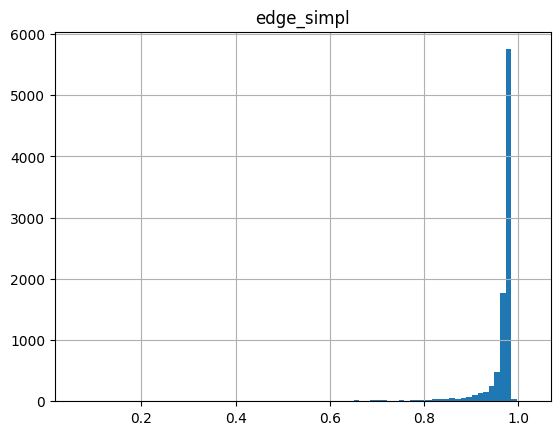

In [6]:
edge_simpl.hist( bins= 80)

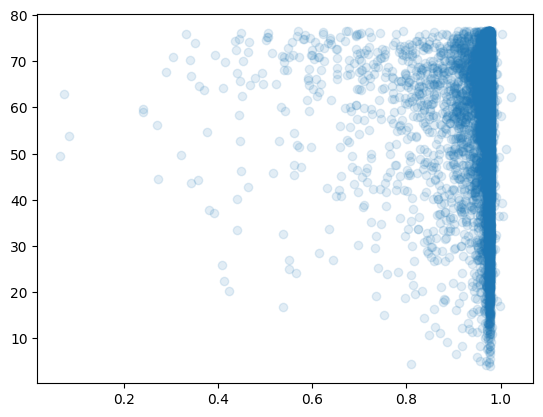

In [7]:
plt.scatter(y=data["score"],x =edge_simpl, alpha=0.125)

### Hue Simplicity

In [8]:
feature = "hue_simpl"

<AxesSubplot:>

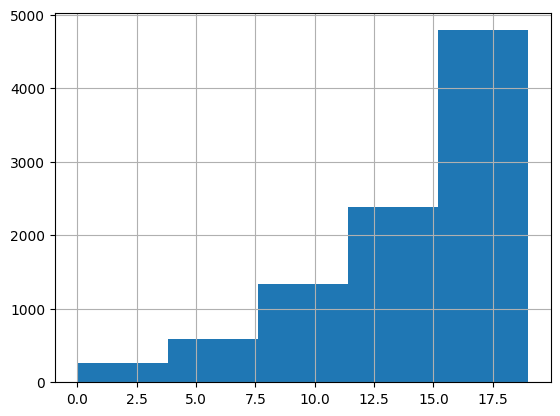

In [9]:
data[feature].hist( bins= 5)

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


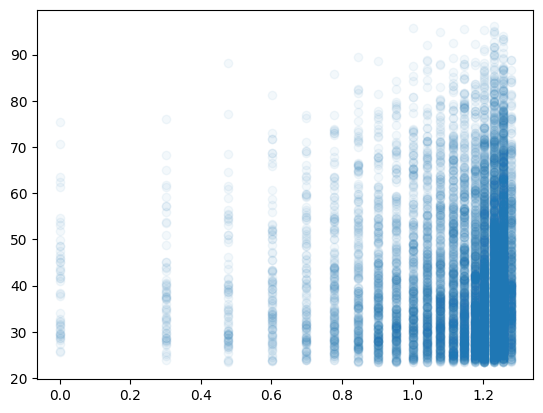

In [10]:
plt.scatter(y=100-data["score"],x =np.log10(data[feature]), alpha=0.05)

## Estatísticas dos dados

Abaixo temos estatísticas de posição das features e do score:

In [11]:
data.describe()

,edge_simpl,hue_simpl,average_lum,contrast_ratio,hist_width,blur,score
count,9349.000000,9349.000000,9349.000000,9349.000000,9349.000000,9349.000000,9349.000000
mean,0.976978,14.157343,44.607939,0.015611,0.827801,0.498695,57.144351
std,0.040025,4.234862,21.387020,0.049906,0.187379,0.006462,14.876310
min,0.253092,0.000000,1.882355,0.000000,0.046875,0.458060,3.911765
25%,0.984212,12.000000,26.865833,0.000000,0.746094,0.496722,48.047297
50%,0.987630,16.000000,45.737270,0.000000,0.902344,0.498919,60.959821
75%,0.988607,17.000000,62.044762,0.008225,0.972656,0.500797,69.026316
max,1.010742,19.000000,89.704538,0.620022,0.992188,0.572941,76.660256


In [12]:
import seaborn as sns

In [ ]:
sns.pairplot(data, kind="kde")

In [ ]:
sns.pairplot(data, diag_kind="kde")

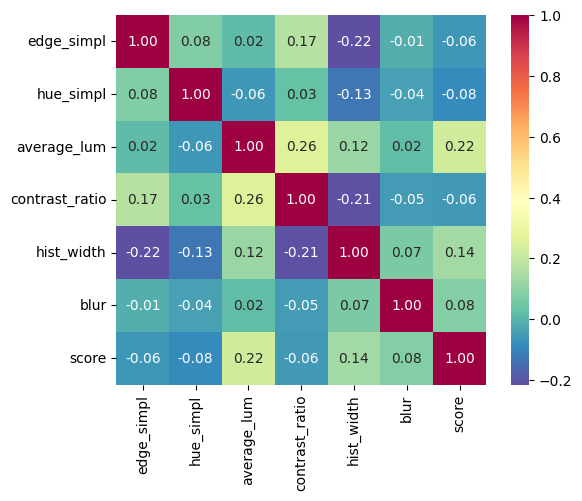

In [13]:
corrmat = data.corr(method="kendall")
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data.columns, 
                 xticklabels=data.columns, 
                 cmap="Spectral_r")
plt.show()

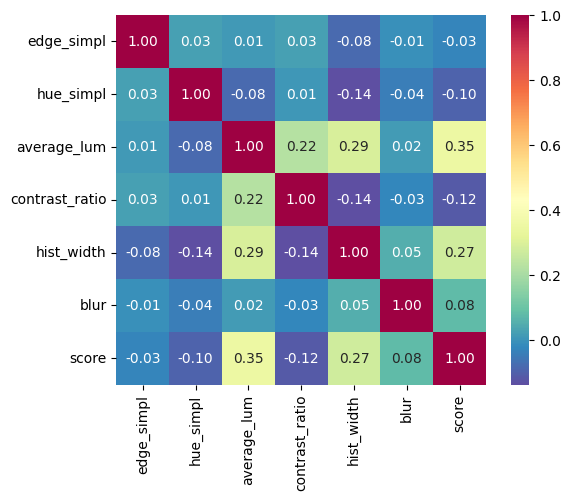

In [16]:
corrmat = data.corr(method="pearson")
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data.columns, 
                 xticklabels=data.columns, 
                 cmap="Spectral_r")
plt.show()